# Final Project Submission
Please fill out:

- Student name: Troy Hendrickson
- Student pace: Full time
- Scheduled project review date/time: January 6th, 2023
- Instructor name: Joseph Mata
- Blog post URL: https://troykhendrix22.blogspot.com/

# Load Imports

In [429]:
#Basics
import numpy as np
import pandas as pd
from IPython.display import Markdown, display
import warnings
warnings.filterwarnings("ignore")

# Data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_roc_curve
%matplotlib inline
from sklearn.metrics import recall_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

# Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer

# Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from surprise.similarities import cosine, msd, pearson
from surprise import accuracy


# Metrics
from sklearn.metrics import accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [374]:
df1 = pd.read_csv('NBA_MVP_Predictor_Dataset_2013_2022.csv', index_col=0)
df1.head()

,names,pts,ast,reb,wins,total_games,win_pct,year,mvp,is_mvp
1,Aaron Brooks,7.094340,2.150943,1.509434,20,53,0.377358,2013,0,NO
2,Aaron Gray,2.833333,0.785714,3.166667,14,42,0.333333,2013,0,NO
3,AJ Price,7.736842,3.596491,2.000000,21,57,0.368421,2013,0,NO
4,Al-Farouq Aminu,7.302632,1.355263,7.697368,25,76,0.328947,2013,0,NO
5,Al Harrington,5.100000,1.000000,2.700000,3,10,0.300000,2013,0,NO


In [375]:
df2 = pd.read_csv('NBA_MVP_Predictor_Dataset_2023_November_10th.csv', index_col=0)
df2.head()

,names,pts,ast,reb,wins,total_games,win_pct,year
1,A.J. Green,0.000000,1.000000,0.000000,1,1,1.000000,2023
2,Aaron Gordon,14.363636,2.636364,7.000000,8,11,0.727273,2023
3,Aaron Holiday,5.181818,2.000000,1.363636,7,11,0.636364,2023
4,Aaron Nesmith,7.428571,1.714286,3.428571,2,7,0.285714,2023
5,Aaron Wiggins,5.000000,1.375000,4.125000,4,8,0.500000,2023


In [376]:
df3 = pd.read_csv('modern_RAPTOR_by_team.csv')
df3.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alex Abrines,abrinal01,2017,PO,OKC,172,80,0.420828,-2.862454,-2.441626,-6.183824,-19.474686,-25.658510,-0.892617,-6.561258,-7.453875,-0.198700,0.000000,-0.198700,-3.298178,-6.535113,-9.833292,0.334678
1,Alex Abrines,abrinal01,2017,RS,OKC,2215,1055,0.770717,-0.179621,0.591096,0.029134,-2.644262,-2.615128,0.654933,-0.724233,-0.069300,1.447708,1.447708,0.000000,0.339201,-0.611866,-0.272665,0.325771
2,Alex Abrines,abrinal01,2018,PO,OKC,233,110,1.123761,-1.807486,-0.683725,4.965907,10.916521,15.882428,1.875157,0.740292,2.615450,0.311392,0.000000,0.311392,2.877519,-0.520954,2.356566,0.260479
3,Alex Abrines,abrinal01,2018,RS,OKC,2313,1134,0.236335,-1.717049,-1.480714,-1.922090,-1.154375,-3.076465,-0.211818,-1.728584,-1.940401,0.465912,0.465912,0.000000,-0.482078,-1.172227,-1.654306,-0.528330
4,Alex Abrines,abrinal01,2019,RS,OKC,1279,588,-3.215683,1.078399,-2.137285,-6.158856,4.901168,-1.257688,-4.040157,1.885618,-2.154538,0.178167,0.178167,0.000000,-4.577678,1.543282,-3.034396,-0.268013


Column | Description
-------|---------------
`player_name` |	Player name
`player_id` |	Basketball-Reference.com player ID
`season` |	Season
`season_type` |	Regular season (RS) or playoff (PO)
`team` |	Basketball-Reference ID of team
`poss` |	Possessions played
`mp` |	Minutes played
`raptor_box_offense` |	Points above average per 100 possessions added by player on offense, based only on box score estimate
`raptor_box_defense` |	Points above average per 100 possessions added by player on defense, based only on box score estimate
`raptor_box_total` |	Points above average per 100 possessions added by player, based only on box score estimate
`raptor_onoff_offense` |	Points above average per 100 possessions added by player on offense, based only on plus-minus data
`raptor_onoff_defense` |	Points above average per 100 possessions added by player on defense, based only on plus-minus data
`raptor_onoff_total` |	Points above average per 100 possessions added by player, based only on plus-minus data
`raptor_offense` |	Points above average per 100 possessions added by player on offense, using both box and on-off components
`raptor_defense` |	Points above average per 100 possessions added by player on defense, using both box and on-off components
`raptor_total` |	Points above average per 100 possessions added by player on both offense and defense, using both box and on-off components
`war_total` |	Wins Above Replacement between regular season and playoffs
`war_reg_season` |	Wins Above Replacement for regular season
`war_playoffs` |	Wins Above Replacement for playoffs
`predator_offense` |	Predictive points above average per 100 possessions added by player on offense
`predator_defense` |	Predictive points above average per 100 possessions added by player on defense
`predator_total` |	Predictive points above average per 100 possessions added by player on both offense and defense
`pace_impact` |	Player impact on team possessions per 48 minutes

# Exploratory Data Analysis/ Data Cleaning 

In [319]:
df1.head()

,names,pts,ast,reb,wins,total_games,win_pct,year,mvp,is_mvp
1,Aaron Brooks,7.094340,2.150943,1.509434,20,53,0.377358,2013,0,NO
2,Aaron Gray,2.833333,0.785714,3.166667,14,42,0.333333,2013,0,NO
3,AJ Price,7.736842,3.596491,2.000000,21,57,0.368421,2013,0,NO
4,Al-Farouq Aminu,7.302632,1.355263,7.697368,25,76,0.328947,2013,0,NO
5,Al Harrington,5.100000,1.000000,2.700000,3,10,0.300000,2013,0,NO


In [320]:
# Merge all 3 data sets together and display max columns
nba_merged = df3.merge(df1, how = 'left', left_on = 'player_name', right_on = 'names')
nba = nba_merged.merge(df2, how = 'left', left_on = 'player_name', right_on = 'names')
pd.set_option('display.max_columns', None)
nba.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,names_x,pts_x,ast_x,reb_x,wins_x,total_games_x,win_pct_x,year_x,mvp,is_mvp,names_y,pts_y,ast_y,reb_y,wins_y,total_games_y,win_pct_y,year_y
0,Alex Abrines,abrinal01,2017,PO,OKC,172,80,0.420828,-2.862454,-2.441626,-6.183824,-19.474686,-25.658510,-0.892617,-6.561258,-7.453875,-0.198700,0.000000,-0.1987,-3.298178,-6.535113,-9.833292,0.334678,Alex Abrines,5.970588,0.588235,1.264706,37.0,68.0,0.544118,2017.0,0.0,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alex Abrines,abrinal01,2017,PO,OKC,172,80,0.420828,-2.862454,-2.441626,-6.183824,-19.474686,-25.658510,-0.892617,-6.561258,-7.453875,-0.198700,0.000000,-0.1987,-3.298178,-6.535113,-9.833292,0.334678,Alex Abrines,4.706667,0.373333,1.520000,42.0,75.0,0.560000,2018.0,0.0,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alex Abrines,abrinal01,2017,PO,OKC,172,80,0.420828,-2.862454,-2.441626,-6.183824,-19.474686,-25.658510,-0.892617,-6.561258,-7.453875,-0.198700,0.000000,-0.1987,-3.298178,-6.535113,-9.833292,0.334678,Alex Abrines,5.322581,0.645161,1.548387,21.0,31.0,0.677419,2019.0,0.0,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alex Abrines,abrinal01,2017,RS,OKC,2215,1055,0.770717,-0.179621,0.591096,0.029134,-2.644262,-2.615128,0.654933,-0.724233,-0.069300,1.447708,1.447708,0.0000,0.339201,-0.611866,-0.272665,0.325771,Alex Abrines,5.970588,0.588235,1.264706,37.0,68.0,0.544118,2017.0,0.0,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alex Abrines,abrinal01,2017,RS,OKC,2215,1055,0.770717,-0.179621,0.591096,0.029134,-2.644262,-2.615128,0.654933,-0.724233,-0.069300,1.447708,1.447708,0.0000,0.339201,-0.611866,-0.272665,0.325771,Alex Abrines,4.706667,0.373333,1.520000,42.0,75.0,0.560000,2018.0,0.0,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [321]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43500 entries, 0 to 43499
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   player_name           43500 non-null  object 
 1   player_id             43500 non-null  object 
 2   season                43500 non-null  int64  
 3   season_type           43500 non-null  object 
 4   team                  43500 non-null  object 
 5   poss                  43500 non-null  int64  
 6   mp                    43500 non-null  int64  
 7   raptor_box_offense    43490 non-null  float64
 8   raptor_box_defense    43490 non-null  float64
 9   raptor_box_total      43490 non-null  float64
 10  raptor_onoff_offense  43490 non-null  float64
 11  raptor_onoff_defense  43490 non-null  float64
 12  raptor_onoff_total    43490 non-null  float64
 13  raptor_offense        43500 non-null  float64
 14  raptor_defense        43500 non-null  float64
 15  raptor_total       

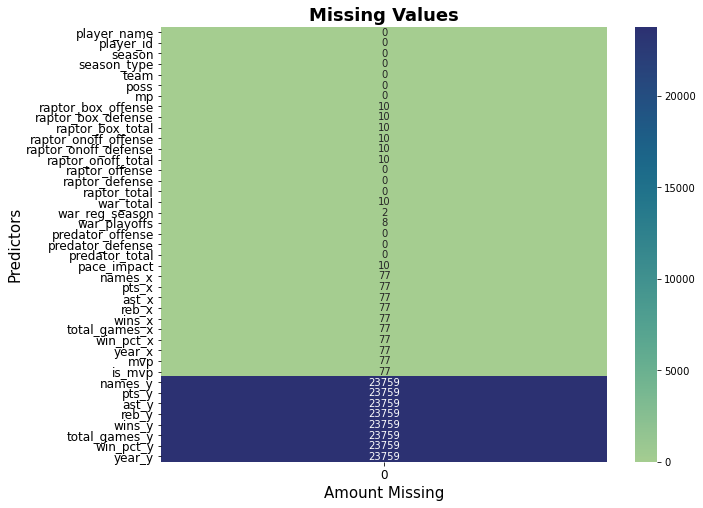

In [322]:
# Further investigation of the missing values
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.heatmap(nba.isna().sum().to_frame(),annot=True,fmt='d',cmap='crest')
ax.set_xlabel('Amount Missing', fontdict = {'fontsize': 15})
ax.set_ylabel('Predictors', fontdict = {'fontsize': 15})
ax.set_title('Missing Values', fontweight='bold', fontdict = {'fontsize': 18})
plt.tick_params(axis='both', labelsize=12)
plt.show()

- can see there are a bunch of missing values that would need to be cleaned up. 
- we will take a deeper dive to see exactly what makes sense to clean this data.

In [323]:
# Make sure changes are made to see if names match up
nba[nba['pts_y'].isnull()][["names_x", "player_name","wins_x"]].head()

,names_x,player_name,wins_x
0,Alex Abrines,Alex Abrines,37.0
1,Alex Abrines,Alex Abrines,42.0
2,Alex Abrines,Alex Abrines,21.0
3,Alex Abrines,Alex Abrines,37.0
4,Alex Abrines,Alex Abrines,42.0


In [324]:
# Drop any duplicates that we don't need
nba.drop_duplicates(inplace=True)
nba.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,names_x,pts_x,ast_x,reb_x,wins_x,total_games_x,win_pct_x,year_x,mvp,is_mvp,names_y,pts_y,ast_y,reb_y,wins_y,total_games_y,win_pct_y,year_y
0,Alex Abrines,abrinal01,2017,PO,OKC,172,80,0.420828,-2.862454,-2.441626,-6.183824,-19.474686,-25.658510,-0.892617,-6.561258,-7.453875,-0.198700,0.000000,-0.1987,-3.298178,-6.535113,-9.833292,0.334678,Alex Abrines,5.970588,0.588235,1.264706,37.0,68.0,0.544118,2017.0,0.0,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alex Abrines,abrinal01,2017,PO,OKC,172,80,0.420828,-2.862454,-2.441626,-6.183824,-19.474686,-25.658510,-0.892617,-6.561258,-7.453875,-0.198700,0.000000,-0.1987,-3.298178,-6.535113,-9.833292,0.334678,Alex Abrines,4.706667,0.373333,1.520000,42.0,75.0,0.560000,2018.0,0.0,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alex Abrines,abrinal01,2017,PO,OKC,172,80,0.420828,-2.862454,-2.441626,-6.183824,-19.474686,-25.658510,-0.892617,-6.561258,-7.453875,-0.198700,0.000000,-0.1987,-3.298178,-6.535113,-9.833292,0.334678,Alex Abrines,5.322581,0.645161,1.548387,21.0,31.0,0.677419,2019.0,0.0,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alex Abrines,abrinal01,2017,RS,OKC,2215,1055,0.770717,-0.179621,0.591096,0.029134,-2.644262,-2.615128,0.654933,-0.724233,-0.069300,1.447708,1.447708,0.0000,0.339201,-0.611866,-0.272665,0.325771,Alex Abrines,5.970588,0.588235,1.264706,37.0,68.0,0.544118,2017.0,0.0,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alex Abrines,abrinal01,2017,RS,OKC,2215,1055,0.770717,-0.179621,0.591096,0.029134,-2.644262,-2.615128,0.654933,-0.724233,-0.069300,1.447708,1.447708,0.0000,0.339201,-0.611866,-0.272665,0.325771,Alex Abrines,4.706667,0.373333,1.520000,42.0,75.0,0.560000,2018.0,0.0,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [325]:
# Drop any null values that came from the merge 
nba1 = nba.dropna()

In [326]:
# Check to make sure changes were made 
nba1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19740 entries, 15 to 43499
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   player_name           19740 non-null  object 
 1   player_id             19740 non-null  object 
 2   season                19740 non-null  int64  
 3   season_type           19740 non-null  object 
 4   team                  19740 non-null  object 
 5   poss                  19740 non-null  int64  
 6   mp                    19740 non-null  int64  
 7   raptor_box_offense    19740 non-null  float64
 8   raptor_box_defense    19740 non-null  float64
 9   raptor_box_total      19740 non-null  float64
 10  raptor_onoff_offense  19740 non-null  float64
 11  raptor_onoff_defense  19740 non-null  float64
 12  raptor_onoff_total    19740 non-null  float64
 13  raptor_offense        19740 non-null  float64
 14  raptor_defense        19740 non-null  float64
 15  raptor_total      

In [327]:
# Drop columns we dont need
nba1.drop(columns=['player_id', 'names_y', 'names_x', 'is_mvp'], inplace=True)
nba1

,player_name,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,pts_x,ast_x,reb_x,wins_x,total_games_x,win_pct_x,year_x,mvp,pts_y,ast_y,reb_y,wins_y,total_games_y,win_pct_y,year_y
15,Precious Achiuwa,2021,PO,MIA,24,12,-20.130150,13.445869,-6.684281,-12.897609,25.766232,12.868623,-19.524216,16.885365,-2.638851,0.000721,0.000000,0.000721,-14.239813,7.007386,-7.232427,2.725036,4.983607,0.475410,3.409836,31.0,61.0,0.508197,2021.0,0.0,8.750000,1.333333,7.000000,7.0,12.0,0.583333,2023.0
16,Precious Achiuwa,2021,PO,MIA,24,12,-20.130150,13.445869,-6.684281,-12.897609,25.766232,12.868623,-19.524216,16.885365,-2.638851,0.000721,0.000000,0.000721,-14.239813,7.007386,-7.232427,2.725036,9.095890,1.123288,6.479452,46.0,73.0,0.630137,2022.0,0.0,8.750000,1.333333,7.000000,7.0,12.0,0.583333,2023.0
17,Precious Achiuwa,2021,RS,MIA,1557,737,-3.876227,1.172972,-2.703254,-3.914412,-1.331056,-5.245468,-4.113660,0.709264,-3.404396,-0.246776,-0.246776,0.000000,-3.657064,0.374133,-3.282930,0.292227,4.983607,0.475410,3.409836,31.0,61.0,0.508197,2021.0,0.0,8.750000,1.333333,7.000000,7.0,12.0,0.583333,2023.0
18,Precious Achiuwa,2021,RS,MIA,1557,737,-3.876227,1.172972,-2.703254,-3.914412,-1.331056,-5.245468,-4.113660,0.709264,-3.404396,-0.246776,-0.246776,0.000000,-3.657064,0.374133,-3.282930,0.292227,9.095890,1.123288,6.479452,46.0,73.0,0.630137,2022.0,0.0,8.750000,1.333333,7.000000,7.0,12.0,0.583333,2023.0
19,Precious Achiuwa,2022,PO,TOR,320,167,-3.399773,-1.121844,-4.521616,1.741147,0.531325,2.272471,-2.531130,-0.755062,-3.286191,-0.046953,0.000000,-0.046953,-3.958067,-0.451657,-4.409724,-0.340793,4.983607,0.475410,3.409836,31.0,61.0,0.508197,2021.0,0.0,8.750000,1.333333,7.000000,7.0,12.0,0.583333,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43495,Ivica Zubac,2022,RS,LAC,3786,1852,-0.920033,1.986362,1.066330,0.343447,-4.677449,-4.334003,-0.693765,0.723358,0.029594,2.626958,2.626958,0.000000,-1.134139,1.759848,0.625709,0.020823,3.744186,0.581395,2.860465,19.0,43.0,0.441860,2018.0,0.0,10.166667,1.416667,10.833333,7.0,12.0,0.583333,2023.0
43496,Ivica Zubac,2022,RS,LAC,3786,1852,-0.920033,1.986362,1.066330,0.343447,-4.677449,-4.334003,-0.693765,0.723358,0.029594,2.626958,2.626958,0.000000,-1.134139,1.759848,0.625709,0.020823,8.898305,1.067797,6.135593,32.0,59.0,0.542373,2019.0,0.0,10.166667,1.416667,10.833333,7.0,12.0,0.583333,2023.0
43497,Ivica Zubac,2022,RS,LAC,3786,1852,-0.920033,1.986362,1.066330,0.343447,-4.677449,-4.334003,-0.693765,0.723358,0.029594,2.626958,2.626958,0.000000,-1.134139,1.759848,0.625709,0.020823,8.277778,1.138889,7.541667,49.0,72.0,0.680556,2020.0,0.0,10.166667,1.416667,10.833333,7.0,12.0,0.583333,2023.0
43498,Ivica Zubac,2022,RS,LAC,3786,1852,-0.920033,1.986362,1.066330,0.343447,-4.677449,-4.334003,-0.693765,0.723358,0.029594,2.626958,2.626958,0.000000,-1.134139,1.759848,0.625709,0.020823,9.027778,1.250000,7.208333,47.0,72.0,0.652778,2021.0,0.0,10.166667,1.416667,10.833333,7.0,12.0,0.583333,2023.0


In [328]:
# Check to make sure changes were made 
nba1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19740 entries, 15 to 43499
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   player_name           19740 non-null  object 
 1   season                19740 non-null  int64  
 2   season_type           19740 non-null  object 
 3   team                  19740 non-null  object 
 4   poss                  19740 non-null  int64  
 5   mp                    19740 non-null  int64  
 6   raptor_box_offense    19740 non-null  float64
 7   raptor_box_defense    19740 non-null  float64
 8   raptor_box_total      19740 non-null  float64
 9   raptor_onoff_offense  19740 non-null  float64
 10  raptor_onoff_defense  19740 non-null  float64
 11  raptor_onoff_total    19740 non-null  float64
 12  raptor_offense        19740 non-null  float64
 13  raptor_defense        19740 non-null  float64
 14  raptor_total          19740 non-null  float64
 15  war_total         

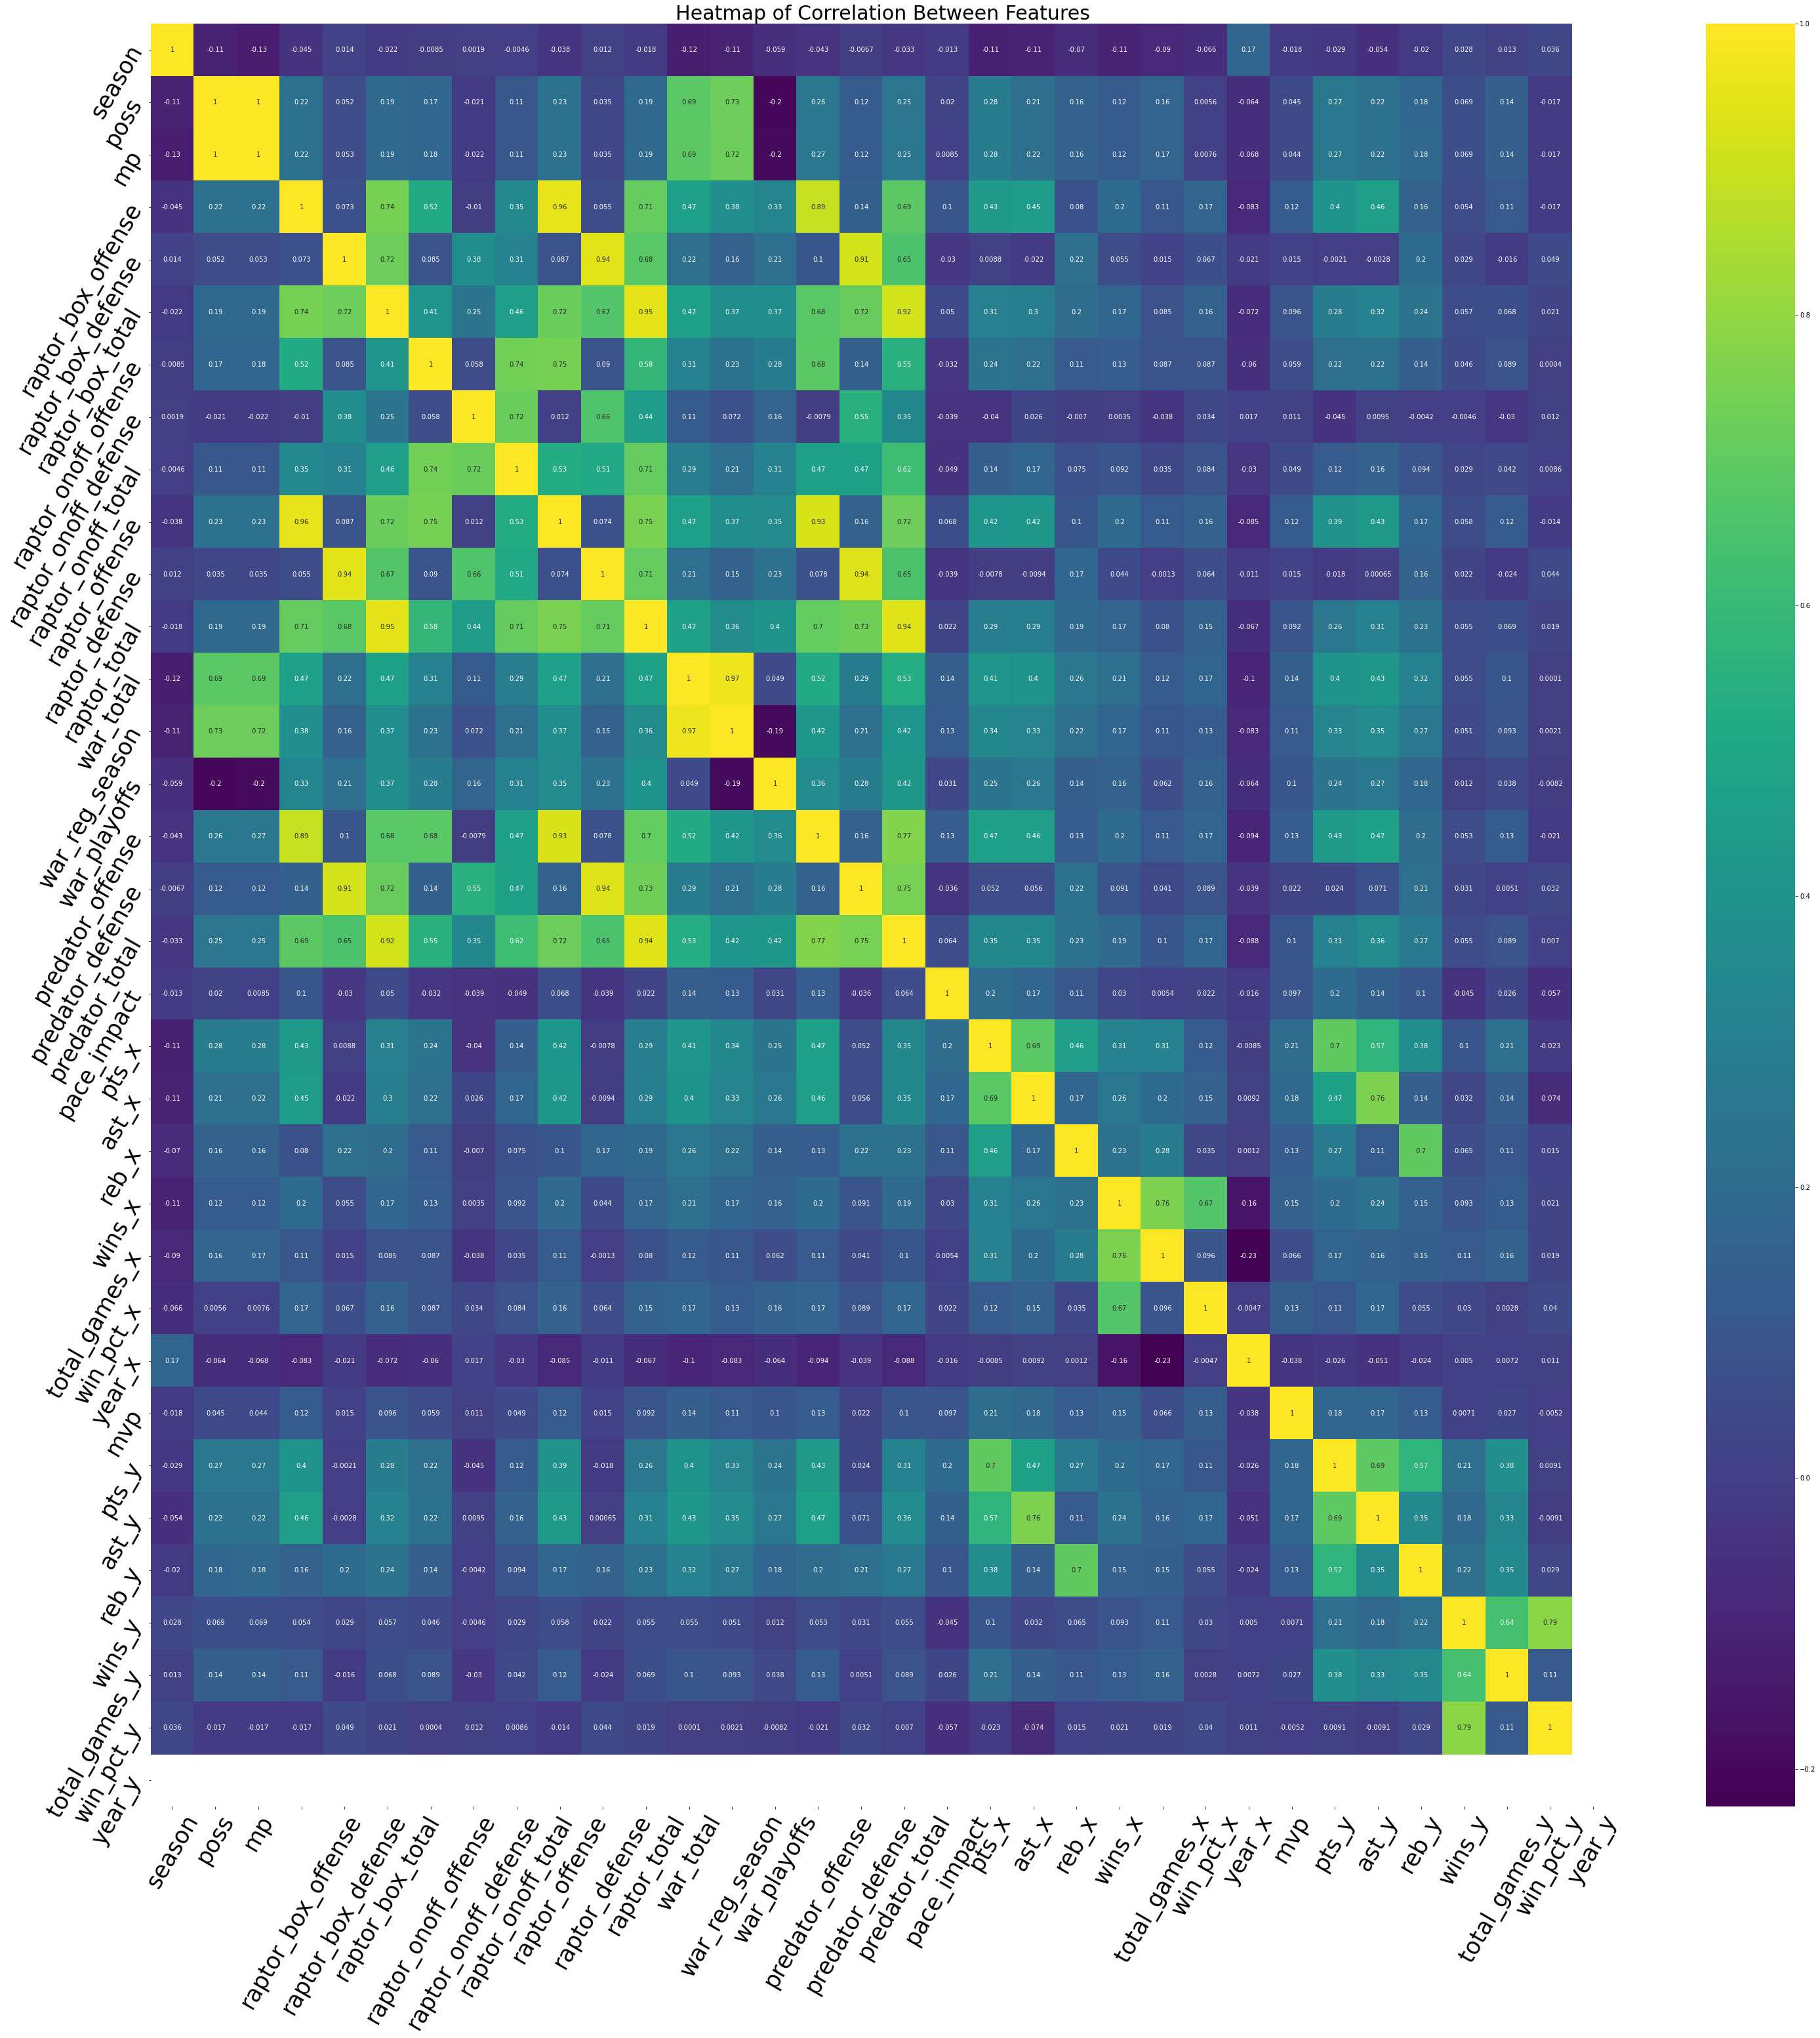

In [330]:
# set up correlation map to see what. features are thew most correlated to mvp
fig, ax = plt.subplots(figsize=(50, 50))
corr = nba1.corr()
x = nba1.drop(columns=['player_name', 'team', 'season_type'])
sns.heatmap(corr, cmap = 'viridis', annot = True)
ax.set_title("Heatmap of Correlation Between Features", size=30);
plt.xticks(rotation=60, size=35)
plt.yticks(rotation=60, size=35)

cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.show()


In [331]:
# Look at how many players are actually in the data set 
len(nba1['player_name'].unique())

386

# Handling Data Imbalance

Being that the data set is very imbalanced, I will need to do some further research on which technique would be beneficial going forward in handling the issue. If imbalance is not handled, the model will not be accurate in which the majority will always take precedent. 

MVP 0: 19587
MVP 1: 153


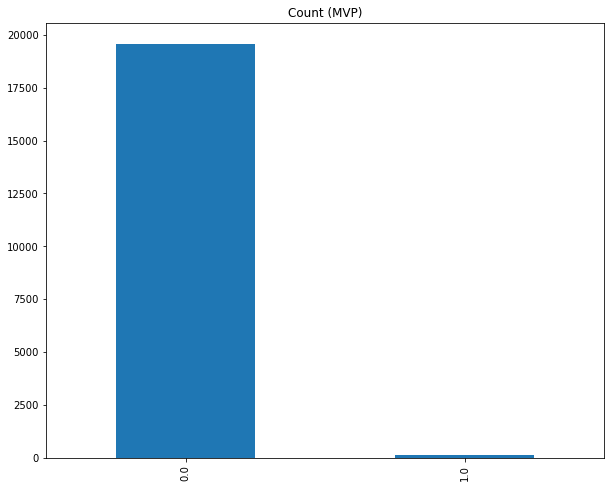

In [369]:
# Can see there is a huge imbalance to the data set 
target_count = nba1.mvp.value_counts()
print('MVP 0:', target_count[0])
print('MVP 1:', target_count[1])

fig = plt.figure(figsize=(10, 8))
target_count.plot(kind='bar', title='Count (MVP)');

In [341]:
# MVP count
count_mvp_0, count_mvp_1 = nba1.mvp.value_counts()

# Divide by MVP
df_mvp_0 = nba1[nba1['mvp'] == 0]
df_mvp_1 = nba1[nba1['mvp'] == 1]

Random under-sampling:
1.0    153
0.0    153
Name: mvp, dtype: int64


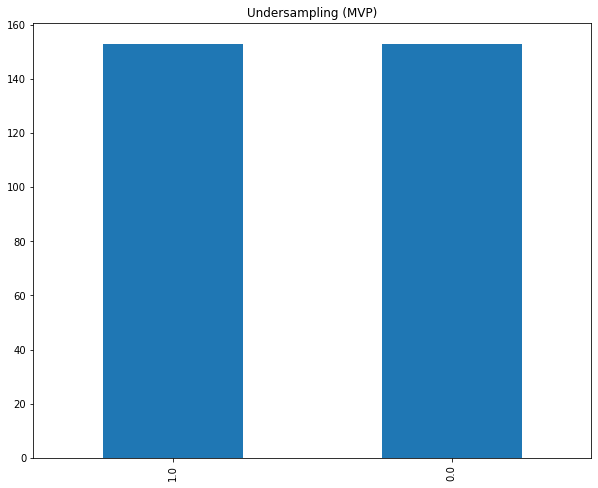

In [364]:
# Show if random undersampling will create less imbalance on data 
df_mvp_0_under = df_mvp_0.sample(count_mvp_1)
df_test_under = pd.concat([df_mvp_0_under, df_mvp_1], axis=0)

print('Random under-sampling:')
print(df_test_under.mvp.value_counts())

fig = plt.figure(figsize=(10, 8))
df_test_under.mvp.value_counts().plot(kind='bar', title='Undersampling (MVP)');

Random over-sampling:
1.0    19587
0.0    19587
Name: mvp, dtype: int64


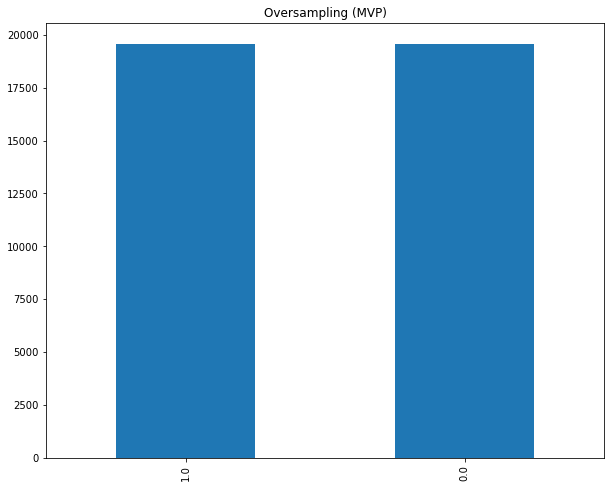

In [365]:
# Show if random oversampling will give us the same result 
df_mvp_1_over = df_mvp_1.sample(count_mvp_0, replace=True)
df_test_over = pd.concat([df_mvp_0, df_mvp_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.mvp.value_counts())

fig = plt.figure(figsize=(10, 8))
df_test_over.mvp.value_counts().plot(kind='bar', title='Oversampling (MVP)');

In [334]:
# Train Test Split
X = nba1.drop(columns = 'mvp', axis = 1)
y = nba1['mvp']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.33, random_state = 42)

# Model 1 - Logistic Regression with SMOTE

In [335]:
# Select only the numerical columns
numerical_data = X_train.select_dtypes(include=["int64", "float64"])

In [337]:
# Print data frame to see everything before it's modeled
X_train

,player_name,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,pts_x,ast_x,reb_x,wins_x,total_games_x,win_pct_x,year_x,pts_y,ast_y,reb_y,wins_y,total_games_y,win_pct_y,year_y
39667,Karl-Anthony Towns,2019,RS,MIN,5358,2545,3.282303,0.081628,3.363931,3.163625,-0.396382,2.767244,3.450810,0.039751,3.490560,8.139935,8.139935,0.000000,3.786539,0.616036,4.402575,0.463124,24.567568,3.635135,9.824324,44.0,74.0,0.594595,2022.0,21.333333,5.500000,8.916667,5.0,12.0,0.416667,2023.0
17636,Udonis Haslem,2017,RS,MIA,266,130,-5.745378,-0.693624,-6.439002,-15.940814,-3.633687,-19.574500,-8.203369,-1.383509,-9.586878,-0.451243,-0.451243,0.000000,-8.183790,-0.745310,-8.929100,-0.480076,4.000000,0.000000,1.000000,1.0,1.0,1.000000,2021.0,1.500000,0.000000,1.000000,1.0,2.0,0.500000,2023.0
25290,Nassir Little,2022,RS,POR,2232,1088,-0.277946,0.949485,0.671538,1.194230,1.923306,3.117536,0.037708,1.275730,1.313437,2.249053,2.249053,0.000000,0.168386,0.561540,0.729926,-0.290465,4.583333,0.479167,2.666667,27.0,48.0,0.562500,2021.0,6.090909,1.090909,2.454545,8.0,11.0,0.727273,2023.0
5580,Jaylen Brown,2019,RS,BOS,4071,1913,-1.288957,0.513227,-0.775730,-2.530043,0.394844,-2.135199,-1.661102,0.487046,-1.174057,1.544475,1.544475,0.000000,-1.219564,1.072419,-0.147145,0.419678,23.621212,3.500000,6.121212,43.0,66.0,0.651515,2022.0,25.363636,2.818182,6.727273,8.0,11.0,0.727273,2023.0
18831,Jrue Holiday,2015,PO,NOP,115,55,3.215279,-4.241294,-1.026015,-4.498593,5.978024,1.479431,1.741028,-2.315962,-0.574934,0.063603,0.000000,0.063603,4.059879,-2.518407,1.541473,1.003358,15.358209,7.283582,3.940299,32.0,67.0,0.477612,2017.0,19.600000,7.900000,5.700000,9.0,10.0,0.900000,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34427,Josh Richardson,2018,PO,MIA,273,130,1.405673,3.165614,4.571287,5.171823,-13.781985,-8.610161,2.273876,-0.127953,2.145924,0.335109,0.000000,0.335109,3.453397,1.307968,4.761365,0.057693,12.901235,2.851852,3.518519,44.0,81.0,0.543210,2018.0,11.636364,3.181818,2.181818,4.0,11.0,0.363636,2023.0
23391,Maxi Kleber,2019,RS,DAL,3140,1502,-1.355660,2.379222,1.023561,0.548414,3.989575,4.537989,-1.055587,2.863225,1.807638,3.479284,3.479284,0.000000,-1.115891,2.314933,1.199042,-0.388877,5.361111,0.708333,3.250000,20.0,72.0,0.277778,2018.0,5.200000,0.800000,4.100000,6.0,10.0,0.600000,2023.0
16696,James Harden,2020,PO,HOU,923,448,7.999361,1.834944,9.834305,1.026929,9.802142,10.829071,7.003390,3.560710,10.564100,3.136792,0.000000,3.136792,5.737837,5.282384,11.020221,-0.058311,24.613636,10.795455,7.909091,31.0,44.0,0.704545,2021.0,22.000000,10.000000,7.000000,4.0,9.0,0.444444,2023.0
18239,Buddy Hield,2017,RS,NOP,2427,1161,-0.935326,-1.536563,-2.471889,-3.532111,-2.623282,-6.155393,-1.486634,-1.877510,-3.364145,-0.363770,-0.363770,0.000000,-2.126333,-2.016947,-4.143280,-0.003575,10.560976,1.475610,3.280488,31.0,82.0,0.378049,2017.0,18.545455,3.272727,5.272727,5.0,11.0,0.454545,2023.0


In [338]:
# Create number column variable
num_cols = X_train.select_dtypes('number').columns

In [431]:
# Create steps for pipeline

# Create numeric pipeline
numeric_pipeline = Pipeline([('numnorm', StandardScaler())])

# Create nominal pipeline
nominal_pipeline = Pipeline([
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first')), 
    ('onehotnorm', MaxAbsScaler())])

# Instantiate columnTransformer
ct = ColumnTransformer(
    [("ohepipe", nominal_pipeline, ['team']), 
     ("numpipe", numeric_pipeline, num_cols)])

# Instantiate final pipe 
final_pipe1 = Pipeline([('preprocess', ct),
                        #('under', RandomUnderSampler(sampling_strategy='majority')), #Use for imbalance purposes
                       ('smote', SMOTE(sampling_strategy='minority')),               #Use for imbalance purposes
                       #('over', RandomOverSampler(sampling_strategy='minority')),    #Use for imbalance purposes
                      ('model', LogisticRegression(random_state = 42))])

# print pipeline to make sure everything is correct
final_pipe1

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ohepipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  ['team']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['season', 'poss', 'mp', 'raptor_box_offense', 'raptor_box_defense',
       'raptor_box_total', 'raptor_onoff_off...
       '

In [432]:
y_test.value_counts(normalize = True)

0.0    0.992325
1.0    0.007675
Name: mvp, dtype: float64

0.9965973534971645
0.9964696853415196


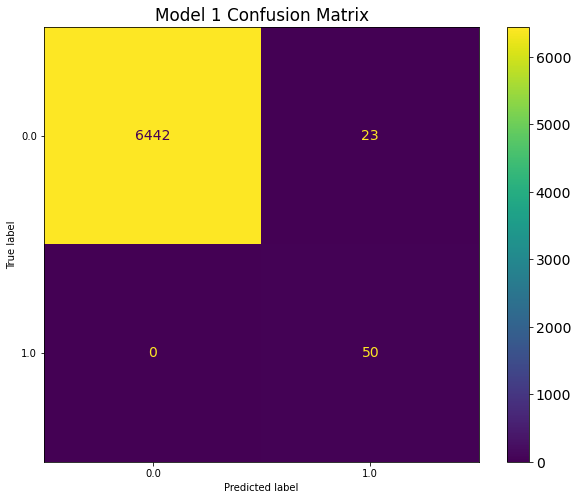

In [433]:
# Fit the model
final_pipe1.fit(X_train,y_train)

#Print scores from model
print(final_pipe1.score(X_train,y_train))
print(final_pipe1.score(X_test,y_test))

#Predict first model
ypred = final_pipe1.predict(X_test)

#plot confusion matrix 
fig, ax = plt.subplots(figsize = (10, 8))
plt.rcParams.update({'font.size': 14})
ax.set_title('Model 1 Confusion Matrix')
plot_confusion_matrix(final_pipe1, X_test, y_test, ax=ax);

In [448]:
# Calculating recall score
model1_recall = recall_score(y_test, ypred)
model1_recall

print('Model 1 Recall Score:', model1_recall)

Model 1 Recall Score: 1.0


In [434]:
print(classification_report(y_test, ypred, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.68      1.00      0.81        50
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.68      1.00      0.81        50
   macro avg       0.23      0.33      0.27        50
weighted avg       0.68      1.00      0.81        50



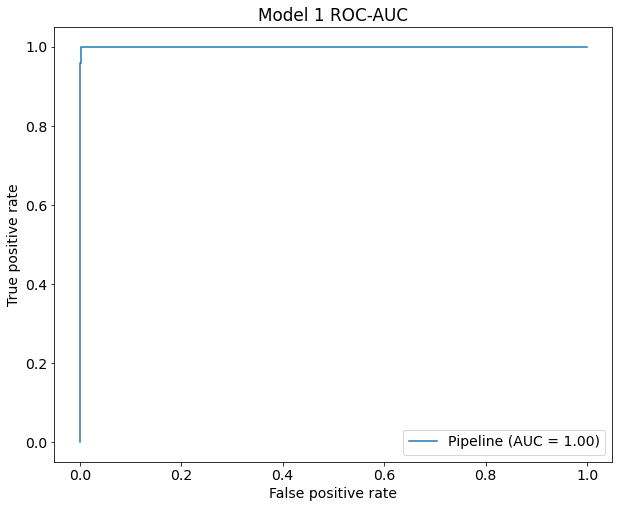

In [435]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (10,8))
plot_roc_curve(final_pipe1, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Model 1 ROC-AUC')
plt.show()

# Model 2 - PCA with Undersampling

In [438]:
# Instantiate final pipe for Model #2
final_pipe2 = Pipeline([('preprocess', ct),
                        ('under', RandomUnderSampler(sampling_strategy='majority')), #Use for imbalance purposes
                       (('pca', PCA(n_components = 3))),               #Use for imbalance purposes
                       #('over', RandomOverSampler(sampling_strategy='minority')),    #Use for imbalance purposes
                      ('model', LogisticRegression(random_state = 42))])

final_pipe2

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ohepipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  ['team']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['season', 'poss', 'mp', 'raptor_box_offense', 'raptor_box_defense',
       'raptor_box_total', 'raptor_onoff_off...
       '

0.8947448015122873
0.8965464313123561


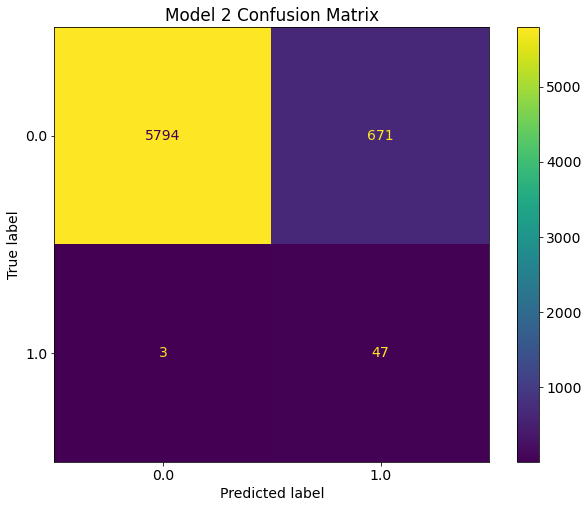

In [450]:
# Fit the model
final_pipe2.fit(X_train,y_train)

#Print scores from model
print(final_pipe2.score(X_train,y_train))
print(final_pipe2.score(X_test,y_test))

#Predict model #2
ypred2 = final_pipe2.predict(X_test)

#plot confusion matrix 
fig, ax = plt.subplots(figsize = (10, 8))
plt.rcParams.update({'font.size': 14})
ax.set_title('Model 2 Confusion Matrix')
plot_confusion_matrix(final_pipe2, X_test, y_test, ax=ax);

In [451]:
model2_recall = recall_score(y_test, ypred2)
model2_recall

print('Model 1 Recall Score:', model2_recall)

Model 1 Recall Score: 0.94


In [440]:
print(classification_report(y_test, ypred2, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.07      0.96      0.14        50
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.07      0.96      0.14        50
   macro avg       0.02      0.32      0.05        50
weighted avg       0.07      0.96      0.14        50



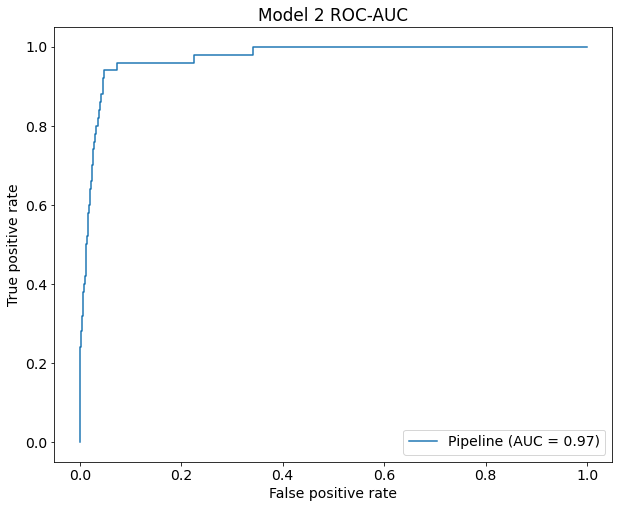

In [443]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (10,8))
plot_roc_curve(final_pipe2, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Model 2 ROC-AUC')
plt.show()

# Model 3 - Decision Tree with Oversampling

In [452]:
#Instantiate final pipe for model #3
final_pipe3 = Pipeline([('preprocess', ct),
                        #('under', RandomUnderSampler(sampling_strategy='majority')), #Use for imbalance purposes
                       #(('smote', SMOTE(sampling_strategy='minority'))),               #Use for imbalance purposes
                       ('over', RandomOverSampler(sampling_strategy='minority')),    #Use for imbalance purposes
                      ('dt_clf', DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 42))])

0.9853308128544424
0.9881811204911742


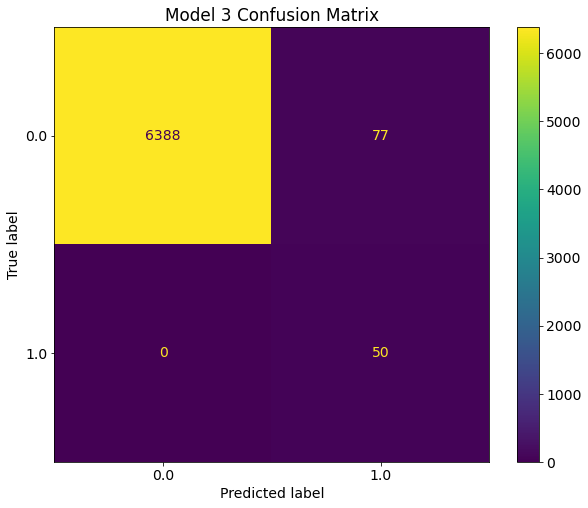

In [454]:
# Fit the model
final_pipe3.fit(X_train,y_train)

#Print scores from model #3
print(final_pipe3.score(X_train,y_train))
print(final_pipe3.score(X_test,y_test))

#Predict first model
ypred3 = final_pipe3.predict(X_test)

#plot confusion matrix 
fig, ax = plt.subplots(figsize = (10, 8))
plt.rcParams.update({'font.size': 14})
ax.set_title('Model 3 Confusion Matrix')
plot_confusion_matrix(final_pipe3, X_test, y_test, ax=ax);

In [455]:
model3_recall = recall_score(y_test, ypred3)
model3_recall

print('Model 1 Recall Score:', model3_recall)

Model 1 Recall Score: 1.0


In [456]:
print(classification_report(y_test, ypred3, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.39      1.00      0.56        50
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.39      1.00      0.56        50
   macro avg       0.13      0.33      0.19        50
weighted avg       0.39      1.00      0.56        50



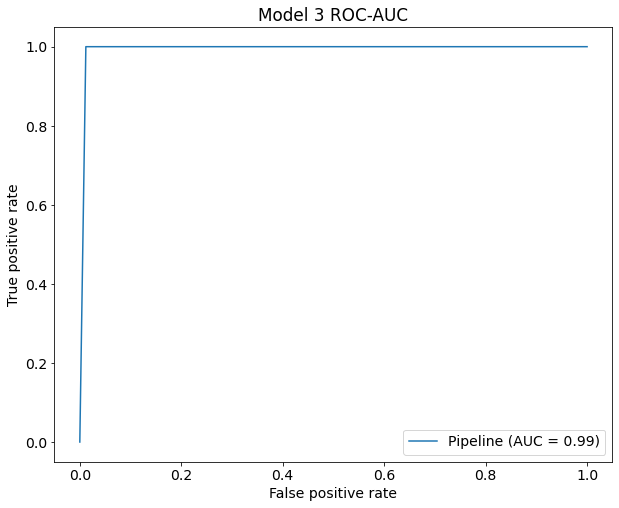

In [457]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (10,8))
plot_roc_curve(final_pipe3, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Model 3 ROC-AUC')
plt.show()

# Model 4 - K Nearest Neighbors with Oversampling

In [460]:
#Instantiate final pipe for model #4
final_pipe4 = Pipeline([('preprocess', ct),
                        #('under', RandomUnderSampler(sampling_strategy='majority')), #Use for imbalance purposes
                       #(('smote', SMOTE(sampling_strategy='minority'))),               #Use for imbalance purposes
                       ('over', RandomOverSampler(sampling_strategy='minority')),    #Use for imbalance purposes
                      ('knn', KNeighborsClassifier())])

In [461]:
# Performing a grid search for our knn
knn_params = {'knn__n_neighbors': [3, 5, 7, 9, 11, 13], 'knn__p': [1, 2, 3, 4, 5]}

knn_grid = GridSearchCV(estimator = final_pipe4, param_grid = knn_params, scoring = 'recall', cv = 5)


In [462]:
# Fitting the training data
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('ohepipe',
                                                                         Pipeline(steps=[('onehotenc',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False)),
                                                                                         ('onehotnorm',
                                                                                          MaxAbsScaler())]),
                                                                         ['team']),
                                                                        ('numpipe',
                                                                         Pipeline(steps=[('numnorm',
                    

In [463]:
# Looking at the best parameters as a result of the grid search
knn_grid.best_params_

{'knn__n_neighbors': 13, 'knn__p': 1}

In [464]:
# Create new pipeline that now has new parameters 
final_pipe4 = Pipeline([('preprocess', ct),
                        #('under', RandomUnderSampler(sampling_strategy='majority')), #Use for imbalance purposes
                       #(('smote', SMOTE(sampling_strategy='minority'))),               #Use for imbalance purposes
                       ('over', RandomOverSampler(sampling_strategy='minority')),    #Use for imbalance purposes
                      ('knn', KNeighborsClassifier(n_neighbors = 13, p = 1))])


In [465]:
# Fitting the training data with the updated pipeline
final_pipe4.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ohepipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  ['team']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['season', 'poss', 'mp', 'raptor_box_offense', 'raptor_box_defense',
       'raptor_box_total', 'raptor_onoff_off...
       '

In [466]:
# Calculating y predictions
ypred4 = final_pipe4.predict(X_test)

0.9733837429111531
0.9742133537989256


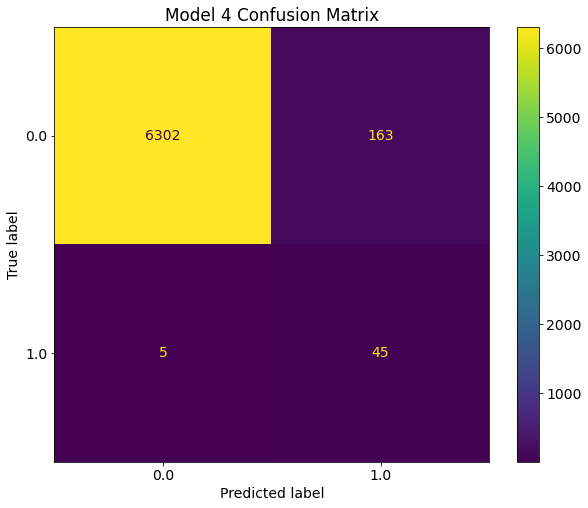

In [467]:
#Print scores from model #4
print(final_pipe4.score(X_train,y_train))
print(final_pipe4.score(X_test,y_test))

#plot confusion matrix 
fig, ax = plt.subplots(figsize = (10, 8))
plt.rcParams.update({'font.size': 14})
ax.set_title('Model 4 Confusion Matrix')
plot_confusion_matrix(final_pipe4, X_test, y_test, ax=ax);

In [468]:
model4_recall = recall_score(y_test, ypred4)
model4_recall

print('Model 1 Recall Score:', model4_recall)

Model 1 Recall Score: 0.9


In [469]:
print(classification_report(y_test, ypred4, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.22      0.90      0.35        50
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.22      0.90      0.35        50
   macro avg       0.07      0.30      0.12        50
weighted avg       0.22      0.90      0.35        50



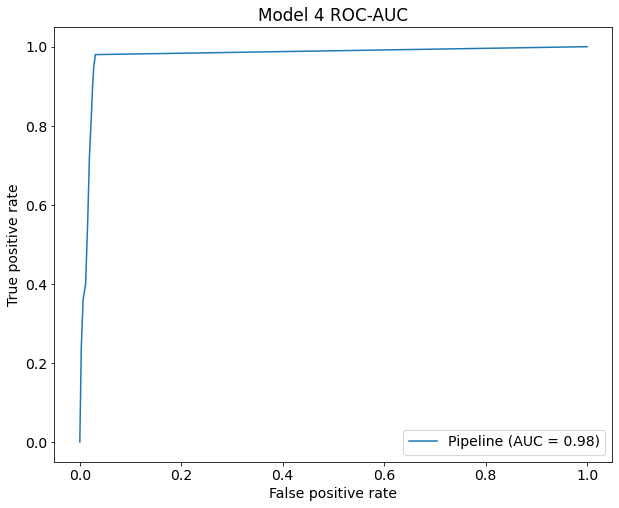

In [470]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (10,8))
plot_roc_curve(final_pipe4, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Model 4 ROC-AUC')
plt.show()

# Model 5 - Random Forest with SMOTE

In [471]:
# Create new pipeline for Random Forest
final_pipe5 = Pipeline([('preprocess', ct),
                        #('under', RandomUnderSampler(sampling_strategy='majority')), #Use for imbalance purposes
                       (('smote', SMOTE(sampling_strategy='minority', random_state = 42))),               #Use for imbalance purposes
                       #('over', RandomOverSampler(sampling_strategy='minority')),    #Use for imbalance purposes
                      ('forest', RandomForestClassifier(random_state = 42))])


In [472]:
# Performing a grid search for our random forest
rf_params = param_grid = {'forest__criterion': ['gini', 'entropy'], 
                          'forest__n_estimators': [50, 150, 200], 
                          'forest__min_samples_leaf': [2, 5, 20, 50],
                         'forest__max_depth': [3, 5, 7]}

rf_grid_pipeline = GridSearchCV(estimator = final_pipe5, param_grid = rf_params, scoring = 'recall', cv = 5)

In [473]:
# Fitting the training data
rf_grid_pipeline.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('ohepipe',
                                                                         Pipeline(steps=[('onehotenc',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False)),
                                                                                         ('onehotnorm',
                                                                                          MaxAbsScaler())]),
                                                                         ['team']),
                                                                        ('numpipe',
                                                                         Pipeline(steps=[('numnorm',
                    

In [474]:
# Looking at the best parameters as a result of the grid search
rf_grid_pipeline.best_params_

{'forest__criterion': 'gini',
 'forest__max_depth': 3,
 'forest__min_samples_leaf': 2,
 'forest__n_estimators': 50}

In [475]:
# Create new pipeline that now has new parameters 
final_pipe5 = Pipeline([('preprocess', ct),
                        #('under', RandomUnderSampler(sampling_strategy='majority')), #Use for imbalance purposes
                       (('smote', SMOTE(sampling_strategy='minority', random_state = 42))),               #Use for imbalance purposes
                       #('over', RandomOverSampler(sampling_strategy='minority')),    #Use for imbalance purposes
                      ('forest', RandomForestClassifier(random_state = 42,
                                                        criterion = 'gini',
                                                        max_depth = 3,
                                                        min_samples_leaf = 2,
                                                        n_estimators = 50))])


In [476]:
# Fitting the training data with the updated pipeline
final_pipe5.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ohepipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  ['team']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['season', 'poss', 'mp', 'raptor_box_offense', 'raptor_box_defense',
       'raptor_box_total', 'raptor_onoff_off...
       '

In [477]:
# Calculating y predictions
ypred5 = final_pipe5.predict(X_test)

0.9752741020793951
0.9780506523407521


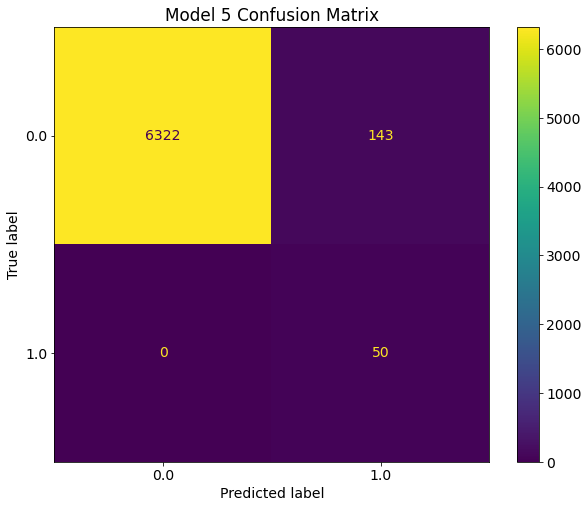

In [478]:
#Print scores from model #5
print(final_pipe5.score(X_train,y_train))
print(final_pipe5.score(X_test,y_test))

#plot confusion matrix 
fig, ax = plt.subplots(figsize = (10, 8))
plt.rcParams.update({'font.size': 14})
ax.set_title('Model 5 Confusion Matrix')
plot_confusion_matrix(final_pipe5, X_test, y_test, ax=ax);

In [479]:
model5_recall = recall_score(y_test, ypred5)
model5_recall

print('Model 1 Recall Score:', model5_recall)

Model 1 Recall Score: 1.0


In [480]:
print(classification_report(y_test, ypred5, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.26      1.00      0.41        50
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.26      1.00      0.41        50
   macro avg       0.09      0.33      0.14        50
weighted avg       0.26      1.00      0.41        50



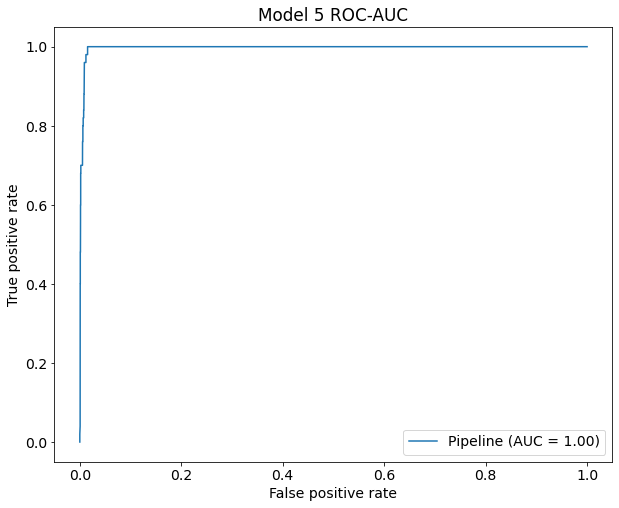

In [481]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (10,8))
plot_roc_curve(final_pipe5, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Model 5 ROC-AUC')
plt.show()